In [1]:
import pandas as pd
from backtest import backtest_dca

import config as cfg

In [2]:
# !python load_data.py

# crypto

In [3]:
df_crypto = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
df_crypto

,BTC,ETH,BNB,XRP,SOL,DOT,ADA,TON,LINK,AVAX
Date,,,,,,,,,,
2024-02-10,47771.277344,2501.228271,323.133881,0.524112,109.131470,7.208863,0.551412,2.078040,19.091101,40.288319
2024-02-11,48293.917969,2507.570557,320.787537,0.526084,107.495285,7.096012,0.541410,2.083629,20.128960,39.732269
2024-02-12,49958.222656,2658.115967,327.944611,0.531897,111.992752,7.346063,0.560031,2.210046,20.491962,41.088188
2024-02-13,49742.441406,2642.185303,324.868225,0.524835,112.579308,7.362933,0.544996,2.163485,19.886284,39.765350
2024-02-14,51826.695312,2777.902344,334.245972,0.538401,116.976326,7.658267,0.577302,2.202948,20.277943,42.268391
...,...,...,...,...,...,...,...,...,...,...
2026-02-10,68793.960938,2019.497437,619.570312,1.399487,82.915482,1.282279,0.261670,1.338288,8.561299,8.743785
2026-02-11,66991.968750,1940.621338,607.187134,1.368019,79.254250,1.254615,0.255552,1.312978,8.311589,8.630200
2026-02-12,66221.843750,1946.940674,613.710938,1.362070,78.348442,1.281533,0.264224,1.388081,8.402665,8.888180


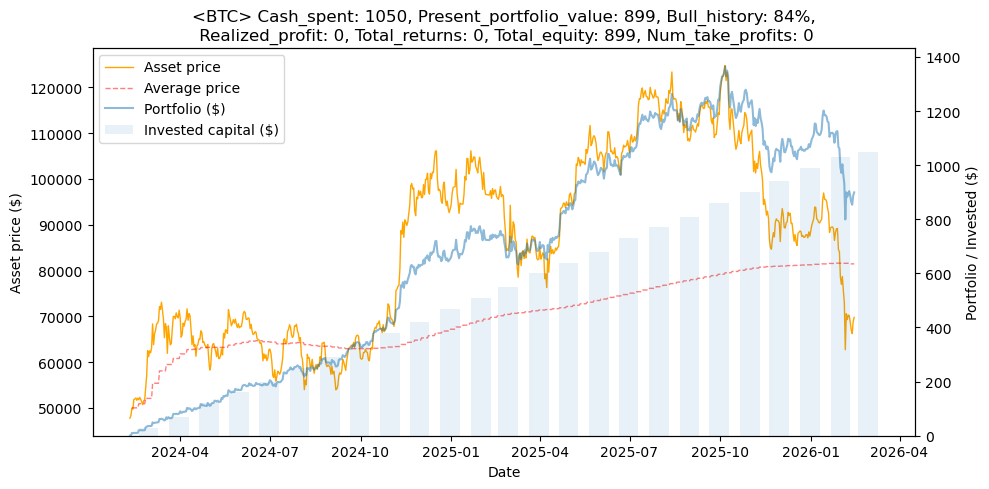

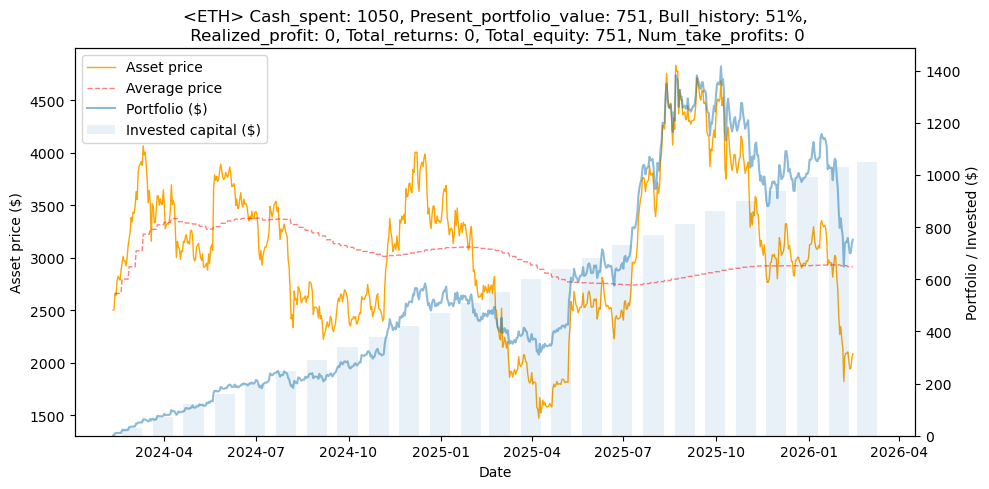

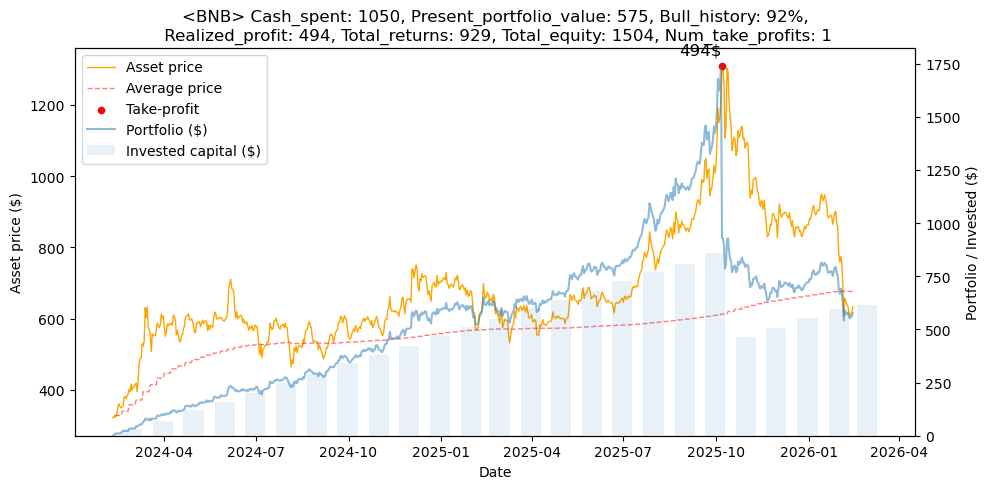

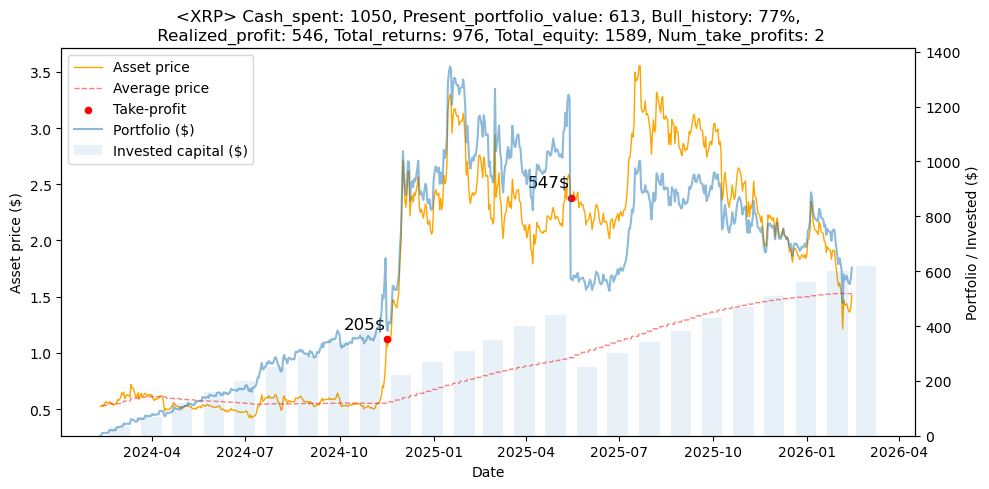

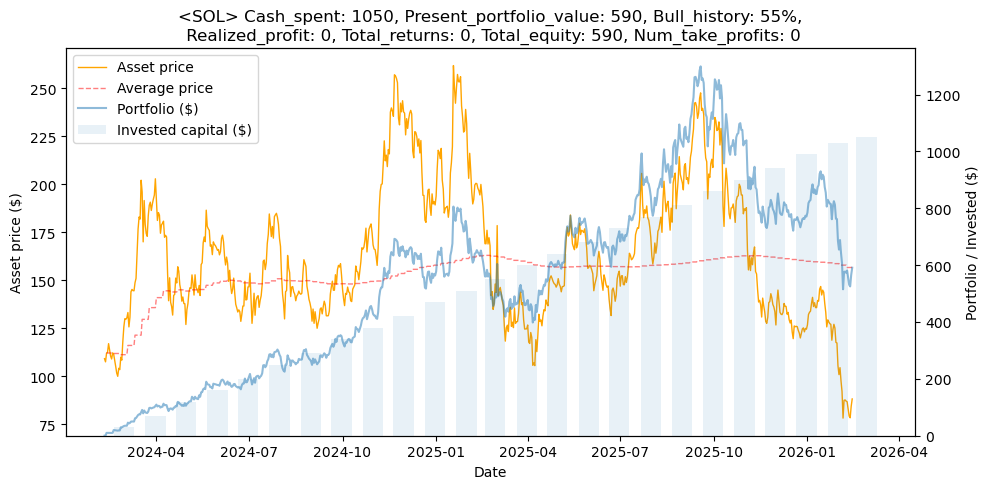

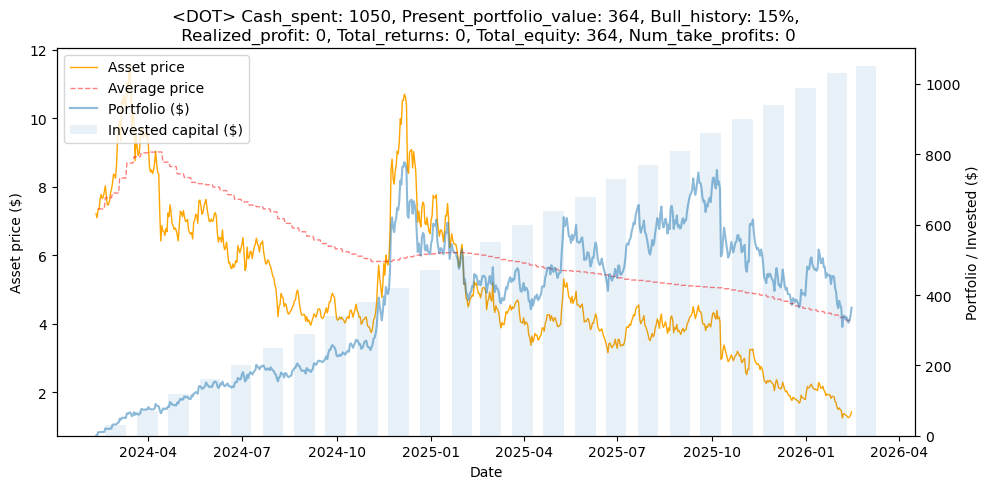

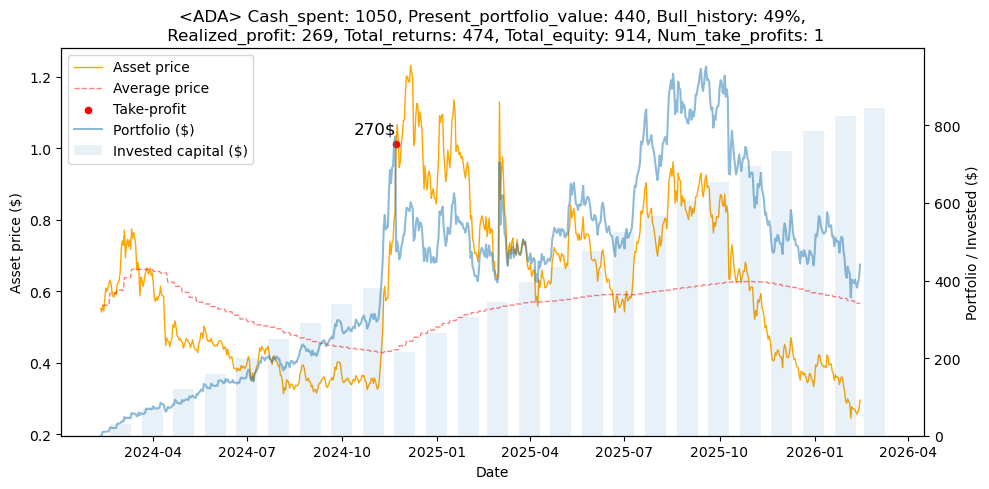

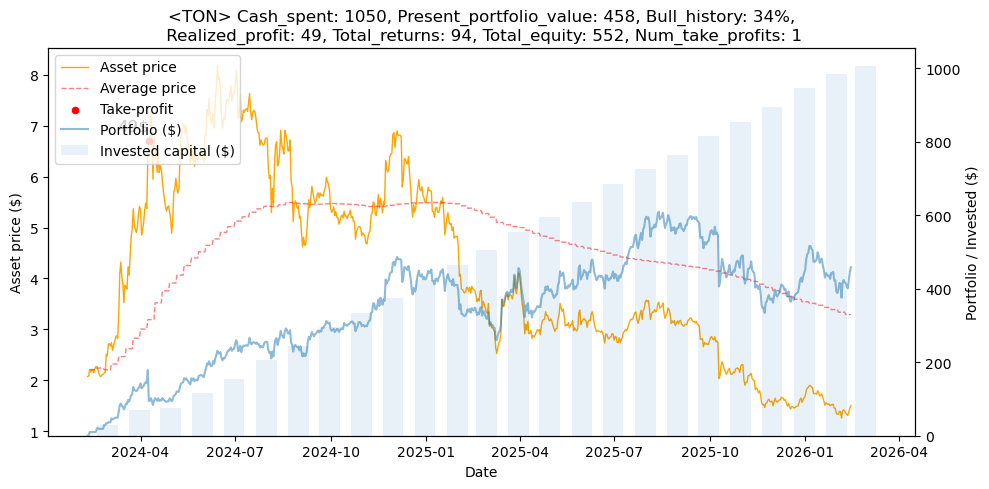

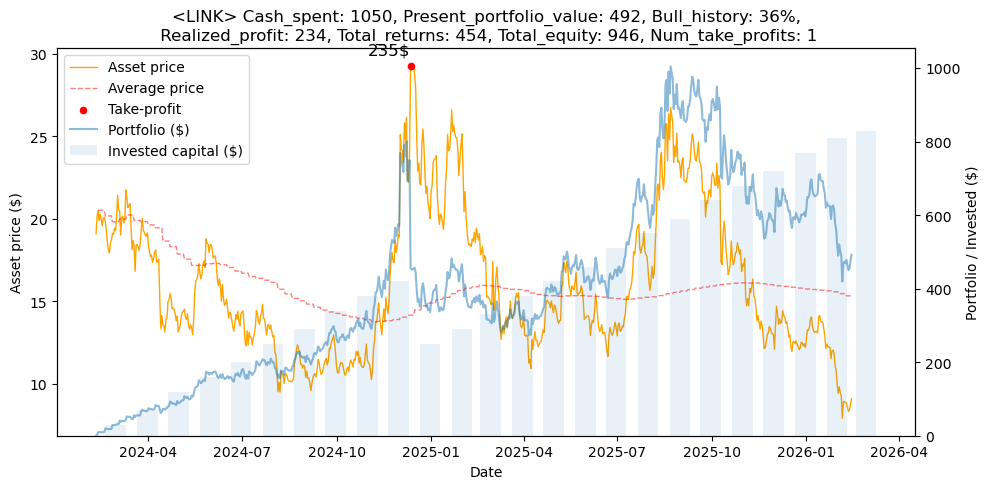

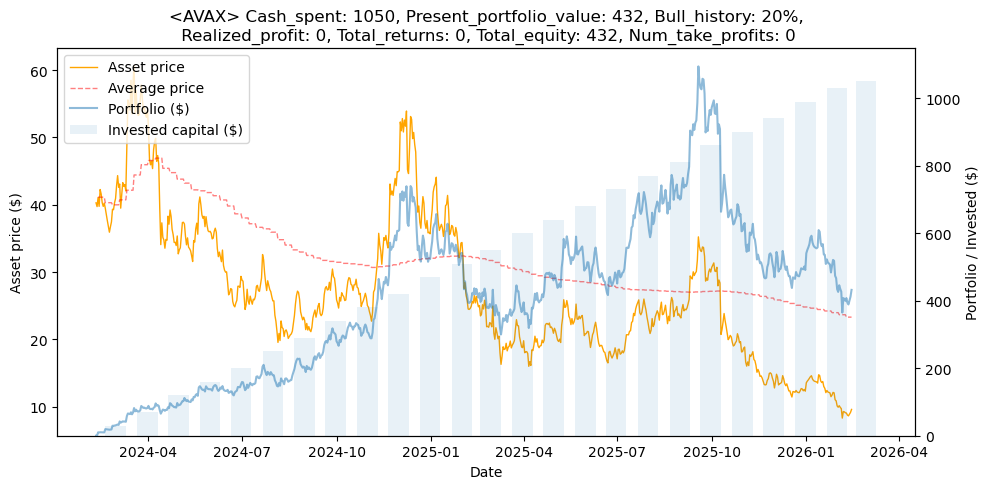

Total invested: $10500.00
Total profit: $1592.00
Total equity: $8541.00


In [4]:
total_invested = 0
total_profit = 0
total_equity = 0

for token in df_crypto.columns:
    token_prices = df_crypto[token]
    token_prices = token_prices.dropna()

    result, metrics = backtest_dca(
        target=token,
        prices=token_prices,
        buy_amount=cfg.crypto_regular_amount,
        freq=cfg.crypto_freq,
        fee=cfg.crypto_fee,
        profit_multiple=cfg.crypto_profit_multiple,
        cooldown_days=cfg.crypto_cooldown_days,
        plot=True
    )
    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")

# stocks

In [5]:
df_stocks = pd.read_csv("data/stocks.csv", index_col=0, parse_dates=True)
df_stocks

,SPY
Date,
2024-02-12,500.980011
2024-02-13,494.079987
2024-02-14,498.570007
2024-02-15,502.010010
2024-02-16,499.510010
...,...
2026-02-09,693.950012
2026-02-10,692.119995
2026-02-11,691.960022


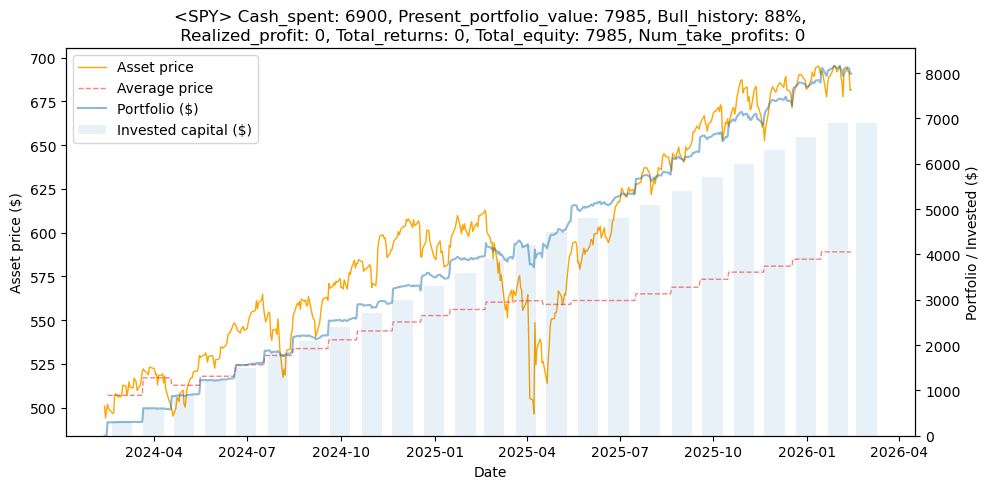

Total invested: $6900.00
Total profit: $0.00
Total equity: $7985.00


In [6]:
total_invested = 0
total_profit = 0
total_equity = 0

for stock in df_stocks.columns:
    stock_prices = df_stocks[stock]
    stock_prices = stock_prices.dropna()

    result, metrics = backtest_dca(
        target=stock,
        prices=stock_prices,
        buy_amount=cfg.stock_regular_amount,
        freq=cfg.stock_freq,
        fee=cfg.stock_fee,
        profit_multiple=cfg.stock_profit_multiple,
        cooldown_days=cfg.stock_cooldown_days,
        plot=True
    )

    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")